In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [9]:
df_16 = pd.read_csv("./csv/Unfallorte2016_LinRef.csv", sep=';')
df_17 = pd.read_csv("./csv/Unfallorte2017_LinRef.csv", sep=';')
df_18 = pd.read_csv("./csv/Unfallorte2018_LinRef.csv", sep=';')
df_19 = pd.read_csv("./csv/Unfallorte2019_LinRef.csv", sep=';')
df_20 = pd.read_csv("./csv/Unfallorte2020_LinRef.csv", sep=';')
df_21 = pd.read_csv("./csv/Unfallorte2021_LinRef.csv", sep=';')

Unfallart (Feld "UART")
1 = Zusammenstoß mit anfahrendem/anhaltendem/ruhendem Fahrzeug
2 = Zusammenstoß mit vorausfahrendem/wartendem Fahrzeug
3 = Zusammenstoß mit seitlich in gleicher Richtung fahrendem Fahrzeug
4 = Zusammenstoß mit entgegenkommendem Fahrzeug
5 = Zusammenstoß mit einbiegendem / kreuzendem Fahrzeug
6 = Zusammenstoß zwischen Fahrzeug und Fußgänger
7 = Aufprall auf Fahrbahnhindernis
8 = Abkommen von Fahrbahn nach rechts
9 = Abkommen von Fahrbahn nach links
0 = Unfall anderer Art

Unfallkategorie (Feld "UKATEGORIE")
1 = Unfall mit Getöteten
2 = Unfall mit Schwerverletzten
3 = Unfall mit Leichtverletzten


Unfalltyp (Feld "UTYP" bzw. "UTYP1")
1 = Fahrunfall
2 = Abbiegeunfall
3 = Einbiegen / Kreuzen-Unfall
4 = Überschreitenunfall
5 = Unfall durch ruhenden Verkehr
6 = Unfall im Längsverkehr
7 = sonstiger Unfall

Lichtverhältnisse (Feld "ULICHTVERH"):
0 = Tageslicht
1 = Dämmerung
2 = Dunkelheit

Straßenzustand (Feld "STRZUSTAND"):
0 = trocken
1 = nass/feucht/schlüpfrig
2 = winterglatt

Wochentag (Feld "UWOCHENTAG"):
1 = Sonntag
2 = Montag
3 = Dienstag
4 = Mittwoch
5 = Donnerstag
6 = Freitag
7 = Samstag



In [10]:
df = pd.concat([df_16,df_17,df_18,df_19,df_20,df_21])

In [11]:
df = df.drop(columns=['UIDENTSTLA', 'LICHT', 'STRZUSTAND', 'OBJECTID_1', 'IstSonstige', 'UIDENTSTLAE', 'USTRZUSTAND', 'LINREFX', 'LINREFY'])

In [12]:
df.XGCSWGS84 = df.XGCSWGS84.str.replace(',', '.')
df.YGCSWGS84 = df.YGCSWGS84.str.replace(',', '.')


In [13]:
df

,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,ULICHTVERH,IstStrasse,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,XGCSWGS84,YGCSWGS84
0,0.0,1.0,1,0,53,120,2016,1,9,5,...,0.0,2.0,0,1,0,0,0.0,0.0,10.621659329000000,53.729614888000000
1,1.0,2.0,1,0,57,10,2016,1,17,3,...,2.0,1.0,0,1,0,0,0.0,0.0,10.149175783000000,54.245452583999999
2,2.0,3.0,1,0,62,8,2016,1,0,5,...,2.0,0.0,0,1,0,0,0.0,0.0,10.518094344000000,53.820402504999997
3,3.0,4.0,1,0,3,0,2016,1,15,5,...,0.0,0.0,1,0,0,0,0.0,1.0,10.683020702000000,53.851243101000001
4,4.0,5.0,1,0,55,28,2016,1,14,1,...,0.0,2.0,0,1,0,0,0.0,0.0,10.620986018000000,54.219458582000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233203,NaN,233204.0,16,0,73,77,2021,12,11,4,...,0.0,NaN,1,0,0,0,0.0,NaN,11.372511765000070,50.650516491000076
233204,NaN,233205.0,16,0,52,0,2021,12,8,4,...,0.0,NaN,0,1,0,0,0.0,NaN,12.078252393000071,50.849209890000054
233205,NaN,233206.0,16,0,53,0,2021,12,12,2,...,0.0,NaN,0,1,1,0,0.0,NaN,11.582085845000051,50.924402083000075
233206,NaN,233207.0,16,0,65,86,2021,12,10,5,...,0.0,NaN,0,1,0,0,0.0,NaN,11.290802448000022,51.371509374000027


In [18]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.XGCSWGS84,df.YGCSWGS84), crs="EPSG:4326"
)

C:\Users\linus\AppData\Local\Temp/ipykernel_20612/3492100635.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


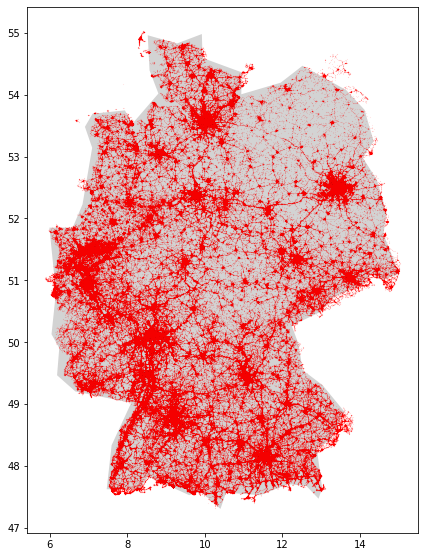

In [19]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
germany = world.loc[world['name'] == 'Germany']

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot()

germany.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, color='red', markersize=0.001)

plt.show()

In [20]:
gdf.to_csv('./csv/base_df.csv')